# Probability

Based on Geoff Gordon's [probability lecture notes](https://qna.cs.cmu.edu/#/pages/view/168), [Random variables lecture notes](https://qna.cs.cmu.edu/#/pages/view/171), [Mean and Variance lecture notes](https://qna.cs.cmu.edu/#/pages/view/173), [Factorizing distributions lecture notes](https://qna.cs.cmu.edu/#/pages/view/174) and [Matt Gormley's Slides](http://www.cs.cmu.edu/~mgormley/courses/606-607-f18/slides606/lecture13-final.pdf).

### Events

\begin{array}{c|c|c|c|c} & & \text{example 1 (coin)}&\text{example 2 (dice)} & \text{example 3 (two coins)}\\
\hline
\text{universe}& \Omega &\{ H, T\} & \{1,2,3,4,5,6\} & \{HH, HT, TH, TT\}\\
\text{event}& X\subseteq\Omega & H & \{3,4\} & \{HT\} \\
\text{outcome}& \omega\in\Omega & H & 1 & HH \\
\text{probability}& P(E) &P(\{H\})=0.5&P(\{3\})=1/6&P(\{HT\})=1/6\\
\end{array}

We use probability to talk about a model of what we think might happen when we conduct experiments. The experiment has multiple outcomes. The universe is the space of all possible outcomes. Events can be **atomic** (corresponding to only one possible outcome) or **compound** (corresponding to a subset of the space). 


We have:
* The complement of an event $E$ is the event that $E$ does not occur. $P(E) +P(\neg E)$. The complement is also denoted by $\text{~}E$ and $\bar E$.
* if $E$ is a compound event, then $P(E) = \textstyle \sum_{a\in E} P(a)$
* $P(\Omega) = 1$.
* $0\le P(E)\le 1$.
* $P(True) = 1$.
* $P(False) = 1$.


### Disjoint union

If $A$ and $B$ are disjoint events (aka mutually exclusive), i.e. $A\cap B=\emptyset$, then the disjoint union rule states that:
$$P(A\cup B) = P(A)+P(B)$$.

Also works for multiple disjoint events $A\cap B=\emptyset$ for $i\ne j$:
$$\textstyle P\left (\bigcup_i A_i\right ) = \sum_i P(A_i)\,.$$




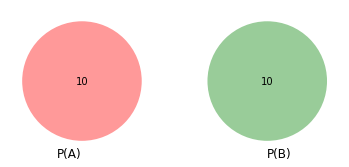

In [6]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import matplotlib.patches as patches

fig,ax = plt.subplots()
venn2(subsets = (10, 10, 0), set_labels = ('P(A)', 'P(B)'),ax=ax)
plt.show();

### Non-disjoint union

If $A\cap B \ne \emptyset$, then:

$$P(A\cup B) = P(A)+P(B) - P(A\cap B)$$


This can be computed by splitting  $P(A\cup B)$ into three sets:

$$P(A\cup B) = P(A\setminus B) + P(A\cap B) + P(B\setminus A)$$

Given $P(A) = P(A\setminus B) + P(A\cap B)$ and $P(B) = P(B\setminus A) + P(A\cap B)$


\begin{eqnarray}
P(A) +P(B) &=& P(A\setminus B) + P(B\setminus A)+ 2P(A\cap B)\\
&=& P(A \cup B) + P(A\cap B)
\end{eqnarray}

Which gives the two useful formulas:
$$P(A\cup B) = P(A)+P(B) - P(A\cap B)$$
and
$$P(A\cap B) = P(A)+P(B) - P(A\cup B)$$


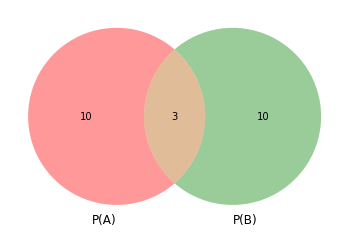

In [7]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import matplotlib.patches as patches

fig,ax = plt.subplots()
venn2(subsets = (10, 10, 3), set_labels = ('P(A)', 'P(B)'),ax=ax)
plt.show();

### Kolmogorov's Axioms

1- $P(E) \ge 0$ for all events $E$

2- P(\Omega) = 1

3- if $E_1$, $E_2$ .. are disjoint, then 
$\textstyle P\left (\bigcup_i E_i\right ) = \sum_i P(E_i)\,.$
 
### Sum Rule

For any two events $A$ and $B$:

$$P(A) = P(A\cup B) + P(A\cup\neg B)$$


### Exercise 
From [notes](https://qna.cs.cmu.edu/#/pages/view/168):
"Consider the following experiment: you stand on a street corner in Pittsburgh and survey people.  You ask two questions: "Do you like computer science?" and "Do you like the Steelers?"  You find that 67% of passers by respond "yes" to the first question, and 90% of passers by respond "yes" to the second question.  Furthermore, 65% of passers by respond "yes" to both questions.

What is the probability of finding a person who responds "no" to both questions?}

# Random Variables

\begin{array}{c|c|c|c|c} & & \text{example 1 (coin)}&\text{example 2 (dice)} & \text{example 3 (two coins)}\\
\hline
\text{universe}& \Omega &\{ H, T\} & \{1,2,3,4,5,6\} & \{HH, HT, TH, TT\}\\
\text{event}& X\subseteq\Omega & H & \{3,4\} & \{HT\} \\
\text{outcome}& \omega\in\Omega & H & 1 & HH \\
\text{probability}& P(E) &P(\{H\})=0.5&P(\{3\})=1/6&P(\{HT\})=1/6\\
\text{random variable} & X & \text{value of coin} & \text{value of top of die} &\text{values of both coins} \\
\end{array}

We denote $X$ (capital) a random variable who's possible values are the outcome of the experiment. We can also define it as a function: $X: \Omega\rightarrow E$.

The value that $X$ takes is refered to as $x$ (lower case).

If $X$ is a discrete random variable, it has a **probability mass function** (pmf), giving the probability of the values that $X$ takes: 
$$p(x) := P(X=x).$$

If $X$ is acontinuous random variable (it's value comes from an interval or collection of intervals), then it has a **probability density function** (pdf) $f(x)$. 
* the pdf $f(x)$ is a nonnegative real number indicating the relative likelihood of $X$ taking value $x$.
* for any continuous random variable $P(X=x) = 0$.
* Non-zero probabilities are only defined for intervals:
$$ P(a\le X\le b) = \int_a^b f(x) dx$$


A **cummulative distribution function** $F(x)$ returns the probability that a variable $X$ is less or equal to $x$:
$$F(X) = P(X\le x)$$

For discrete random variables:
$$F(X) = P(X\le x) = \sum_{x\le x'} P(X= x') = \sum_{x\le x'} p(x')$$

For continuous random variables:
$$F(X) = P(X\le x) = \int_{-\inf}^x f(x') dx'$$


#### Events and random variables

We defined $P(E)$ as a function mapping probabilities to events and now we are writing $P(X=x)$: we are thinking of $X=x$ is an event, and P(X=x) is a shorthand:

$$P(X=x) \equiv P(\{ \omega \in \Omega: X(\omega) = x\})$$

Another type of event is $X\le 7$:

$$P(X\le 7) \equiv P(\{ \omega \in \Omega: X(\omega) \le 7 \})$$

#### Other notational shortcuts:

$P(A|B) = \frac{P(A,B)}{P(B)}$ is equivalent to having, for all values of $a$ and $b$:  $P(A=a|B=b) = \frac{P(A=a,B=b)}{P(B=b)}$

### Probability tables

$$\begin{array}{c|c} a &p(\{a\}) \\ \hline 
5'3''& 0.08\\
5'4''& 0.105\\
\vdots & \vdots \end{array}$$

### Joint distribution

We can have multiple random variables in the same experiment. The universe then corresponds to the set of all possible joint settings of the different variable. Each atomic event is a setting for one of the variables. For example, 
$$\text{height} = \text{5'3"}  \wedge \text{eye color} = \text{brown},$$
is an atomic event.

We can write the probability table by using multiple dimentions:

$$\begin{array}{c|ccc} & \text{brown} & \text{blue} & \text{green} \\ \hline 5'3'' & .05 & .02 & .01 \\ 5'4'' & .06 & .025  & .02\\ \vdots & & \vdots & \end{array}$$

We can also write the probability table as a list to avoid dealing with more than 2 dimensions:

$$\begin{array}{cc|c} \text{height}  & \text{eye color} & P \\ \hline 5'3''  & \text{brown} & .03 \\ 5'3'' & \text{blue} & .02 \\ 5'3'' &  \text{green} & .01 \\ & \vdots & \vdots \end{array}$$

### Marginal distribution

Given a joint distribution over multiple random variables, the dsitribution for a subset of variables is called the marginal and is obtained by marginalizing out the other variables. For each configuration of the variables we want to keep, we sum the probabilities over all the variables we want to marginalize out. 

For example, to obtain the marginal distribution for height, we sum over the three eye colors for each height value:

$$\begin{array}{cccc} 5'3'' & .08 \\ 5'4'' & .105 \\ \vdots & \vdots \end{array}$$

### Conditional distribution

A conditional distribution corresponds to fixing the probability of a subset of variables when fixing the value of another set of variables. To obtain it, we keep the values in the table that are consistent with the variables we fix the values for, then we normalize the remaining entries by the sum of these entries.

For example, the conditional distibution of eye color given a height of $5'3''$ is:
$$\begin{array}{ccc} \text{brown} & \text{blue} & \text{green} \\  .625 & .25 & .125 \end{array}$$

We write conditional distrubtions of $X$ and $Y$ given $Z$ and $W$ as $P(X,Y|Z,W)$. We can write:  $P(X=x,Y=y|Z=z,W=w)$ for specific values $x$, $y$, $z$ and $w$. If we don't, then we have a table (in this case a 4D table). 

### Exercise

From [notes](https://qna.cs.cmu.edu/#/pages/view/171):
"Suppose we have three random variables:

$X\in\{1,2\}$, $Y\in\{1,2,3\}$, $Z\in\{1,2,3,4,5\}$.
Build a joint probability table according to the following rule:

$P(X,Y,Z)=\nu(X+Y+Z)$

Solve for the normalizing factor $\nu$ using the rule that $\sum_X\sum_Y\sum_Z P(X,Y,Z)=1$.

What is the probability of the event $Y=2$?

Now condition on Y=2 to get a table of P(X,Z∣Y=2).

What is the probability that Z≥4 given Y=2?